## 판다스 형식으로 데이터 불러오기

In [4]:
# 데이터를 판다스를 통해 가공하고자 함
import pandas as pd
df =pd.read_csv('./dataset/train.csv')

## 세대주를 선별해 데이터 프레임 만들기 
- "코스타리카 가구 빈곤레벨 측정"이 주제이므로 가구원들은 모두 동일한 빈곤레벨을 지닐것

In [6]:
#가구주인 사람들만 뽑은 데이터 프레임 df_h (parentesco1=1)
df_h = df.loc[df["parentesco1"]==1]
df_h.head()

SyntaxError: invalid syntax (<ipython-input-6-638d3033245b>, line 2)

In [3]:
#결측값은 0으로 제거해주기 
df_h = df_h.fillna(0)

## 결과값 데이터 df_y

In [4]:
# 결과값 데이터에 해당하는 y를 뽑아냄 (타겟)
df_y =pd.DataFrame(df_h["Target"])
df_y.head()

Target
0       4
1       4
2       4
5       4
8       4

## 유의미한 피쳐 데이터 df_x

In [5]:
#불필요한 피쳐들 제거해 x1값 만들기 
# age, SQBescolari, SQBage, SQBhogar_total, SQBedjefe, SQBhogar_nin, SQBovercrowding,
# SQBdependency, SQBmeaned, agesq

#결과값 y에 해당하는 값 삭제 
df_x1 = df_h.drop(["Target"],1)
#세대주성별 교육년수 (논의필요)
df_x1 = df_x1.drop(["edjefa", "edjefe"],1) 
#중복정보 제거
df_x1 = df_x1.drop(["dependency","female","area2","hacdor","hacapo","bedrooms","r4h3","r4m3"],1) 
#수학적으로 의미가 없는 값 제거
df_x1 = df_x1.drop(["Id","SQBescolari", "SQBage", "SQBhogar_total", "SQBedjefe", "SQBhogar_nin", "SQBovercrowding","idhogar"],1) 
#세대주와의 관계열 제거
df_x1 = df_x1.drop(["parentesco1","parentesco2","parentesco3","parentesco4","parentesco5","parentesco6","parentesco7","parentesco8",
                   "parentesco9","parentesco10","parentesco11","parentesco12"],1)
#집세 임시제거!!!!!!!!!!!!!!!!!!!!!!!!!!
df_x1 = df_x1.drop(["v2a1"],1)
df_x1.head()

rooms  v14a  refrig  v18q  v18q1  r4h1  r4h2  r4m1  r4m2  r4t1  ...    \
0      3     1       1     0    0.0     0     1     0     0     0  ...     
1      4     1       1     1    1.0     0     1     0     0     0  ...     
2      8     1       1     0    0.0     0     0     0     1     0  ...     
5      5     1       1     1    1.0     0     2     1     1     1  ...     
8      2     1       1     0    0.0     0     1     2     1     2  ...     

   lugar2  lugar3  lugar4  lugar5  lugar6  area1  age  SQBdependency  \
0       0       0       0       0       0      1   43            0.0   
1       0       0       0       0       0      1   67           64.0   
2       0       0       0       0       0      1   92           64.0   
5       0       0       0       0       0      1   38            1.0   
8       0       0       0       0       0      1   30            1.0   

   SQBmeaned  agesq  
0      100.0   1849  
1      144.0   4489  
2      121.0   8464  
5      121.0   1444  
8      100.0    900  

[5 rows x 111 columns]

In [6]:
#새로운열 추가 
# df_x1['rent_to_rooms'] = df_x1['v2a1']/df_x1['rooms']
# df_x1['r4t3_to_rooms'] = df_x1['r4t3']/df_x1['rooms']
# df_x1['rent_to_r4t3'] = df_x1['v2a1']/df_x1['r4t3']
# df_x1['v2a1_to_r4t3'] = df_x1['v2a1']/(df_x1['r4t3'] - df_x1['r4t1'])
df_x1['lent'] = df_x1['tamviv']-df_x1['tamhog']

#열 생성 이후 불필요한 열 제거 
df_x1 = df_x1.drop(["r4t1","r4t2","r4t3","tamhog","tamviv"],1) 
df_x1.head()

rooms  v14a  refrig  v18q  v18q1  r4h1  r4h2  r4m1  r4m2  escolari  ...   \
0      3     1       1     0    0.0     0     1     0     0        10  ...    
1      4     1       1     1    1.0     0     1     0     0        12  ...    
2      8     1       1     0    0.0     0     0     0     1        11  ...    
5      5     1       1     1    1.0     0     2     1     1        11  ...    
8      2     1       1     0    0.0     0     1     2     1         9  ...    

   lugar3  lugar4  lugar5  lugar6  area1  age  SQBdependency  SQBmeaned  \
0       0       0       0       0      1   43            0.0      100.0   
1       0       0       0       0      1   67           64.0      144.0   
2       0       0       0       0      1   92           64.0      121.0   
5       0       0       0       0      1   38            1.0      121.0   
8       0       0       0       0      1   30            1.0      100.0   

   agesq  lent  
0   1849     0  
1   4489     0  
2   8464     0  
5   1444     0  
8    900     0  

[5 rows x 107 columns]

In [7]:
from tqdm import tqdm_notebook
import tensorflow as tf
import numpy as np

C:\Python\Anaconda3-52\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
#112개의 피쳐
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = df_h

x_data = df_x1
y_data = df_y 

print(x_data.shape, y_data.shape)
print('\nx_data :\n', x_data)
print('\ny_data :\n', y_data)

nb_classes = 4  # 1 ~ 4

X = tf.placeholder(tf.float32, [None, 107])
Y = tf.placeholder(tf.int32, [None, 1])  # 1 ~ 4

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("\none_hot", Y_one_hot)

Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("\nreshape", Y_one_hot)

W = tf.Variable(tf.random_normal([107, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

(2973, 107) (2973, 1)

x_data :
       rooms  v14a  refrig  v18q  v18q1  r4h1  r4h2  r4m1  r4m2  escolari  \
0         3     1       1     0    0.0     0     1     0     0        10   
1         4     1       1     1    1.0     0     1     0     0        12   
2         8     1       1     0    0.0     0     0     0     1        11   
5         5     1       1     1    1.0     0     2     1     1        11   
8         2     1       1     0    0.0     0     1     2     1         9   
12        3     1       1     0    0.0     0     0     0     2        11   
13        4     1       1     1    1.0     0     1     0     1         4   
18        2     1       1     0    0.0     0     2     0     2        10   
20        4     1       1     0    0.0     0     1     0     1        15   
21        3     1       1     0    0.0     0     1     0     1         4   
23        1     0       1     0    0.0     0     2     0     1         6   
26        5     1       1     0    0.0     0     1     

[2973 rows x 107 columns]

y_data :
       Target
0          4
1          4
2          4
5          4
8          4
12         4
13         4
18         4
20         4
21         4
23         4
26         4
27         4
30         4
33         4
39         4
40         4
43         4
45         4
49         4
53         2
56         4
58         2
59         4
61         4
64         2
68         4
72         4
74         4
77         4
...      ...
9477       2
9480       3
9481       4
9485       1
9487       4
9490       3
9492       2
9495       4
9499       4
9502       4
9505       4
9506       3
9507       4
9508       1
9510       4
9512       4
9515       1
9517       4
9519       4
9523       3
9526       4
9528       4
9530       4
9531       4
9534       3
9535       1
9541       2
9545       4
9551       2
9552       2

[2973 rows x 1 columns]

one_hot Tensor("one_hot:0", shape=(?, 1, 4), dtype=float32)

reshape Tensor("Reshape:0", shape=(?, 4), dtype=float32)


In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        loss, acc = sess.run([cost, accuracy], feed_dict={
                             X: x_data, Y: y_data})
        print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
            step, loss, acc))

Step:     0, 	 Loss: 58396.867, 	 Acc: 14.87%
Step:   100, 	 Loss: 93567.008, 	 Acc: 14.97%
Step:   200, 	 Loss: 157335.016, 	 Acc: 7.47%
Step:   300, 	 Loss: 100277.609, 	 Acc: 12.01%
Step:   400, 	 Loss: 67670.984, 	 Acc: 11.94%
Step:   500, 	 Loss: 57397.633, 	 Acc: 65.72%
Step:   600, 	 Loss: 110077.359, 	 Acc: 12.34%
Step:   700, 	 Loss: 150546.172, 	 Acc: 12.48%
Step:   800, 	 Loss: 131937.812, 	 Acc: 65.72%
Step:   900, 	 Loss: 30233.896, 	 Acc: 14.80%
Step:  1000, 	 Loss: 145333.016, 	 Acc: 65.72%
Step:  1100, 	 Loss: 22318.104, 	 Acc: 14.26%
Step:  1200, 	 Loss: 87550.898, 	 Acc: 7.50%
Step:  1300, 	 Loss: 101519.391, 	 Acc: 15.17%
Step:  1400, 	 Loss: 67528.469, 	 Acc: 65.62%
Step:  1500, 	 Loss: 123945.891, 	 Acc: 7.64%
Step:  1600, 	 Loss: 97868.914, 	 Acc: 8.14%
Step:  1700, 	 Loss: 35495.195, 	 Acc: 14.77%
Step:  1800, 	 Loss: 102444.969, 	 Acc: 16.04%
Step:  1900, 	 Loss: 71028.461, 	 Acc: 7.47%


## learning rate 조절해서 정확도를 높이고자 함
-> 정확도가 꾸준히 개선되지 않는 모습 보임

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

#이전과 같은 결과 -> 피쳐값들간의 normalized의 필요성 인지 
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        loss, acc = sess.run([cost, accuracy], feed_dict={
                             X: x_data, Y: y_data})
        print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
            step, loss, acc))

Step:     0, 	 Loss: 488.962, 	 Acc: 21.66%
Step:   100, 	 Loss: 355.583, 	 Acc: 15.10%
Step:   200, 	 Loss: 560.555, 	 Acc: 15.34%
Step:   300, 	 Loss: 533.910, 	 Acc: 8.38%
Step:   400, 	 Loss: 179.292, 	 Acc: 13.86%
Step:   500, 	 Loss: 601.030, 	 Acc: 65.66%
Step:   600, 	 Loss: 1017.834, 	 Acc: 21.83%
Step:   700, 	 Loss: 835.771, 	 Acc: 13.66%
Step:   800, 	 Loss: 1117.421, 	 Acc: 12.41%
Step:   900, 	 Loss: 921.833, 	 Acc: 65.66%
Step:  1000, 	 Loss: 597.864, 	 Acc: 16.99%
Step:  1100, 	 Loss: 873.148, 	 Acc: 14.87%
Step:  1200, 	 Loss: 1089.010, 	 Acc: 7.47%
Step:  1300, 	 Loss: 905.739, 	 Acc: 7.47%
Step:  1400, 	 Loss: 553.220, 	 Acc: 14.80%
Step:  1500, 	 Loss: 1242.261, 	 Acc: 7.47%
Step:  1600, 	 Loss: 911.795, 	 Acc: 65.72%
Step:  1700, 	 Loss: 750.177, 	 Acc: 11.94%
Step:  1800, 	 Loss: 269.316, 	 Acc: 12.78%
Step:  1900, 	 Loss: 1438.825, 	 Acc: 14.87%


## xavier와 adam optimizer 활용

In [11]:
def xavier_init(n_inputs, n_outputs, uniform=True):
    if uniform:
        # 6 was used in the paper.
        init_range = tf.sqrt(6.0 / (n_inputs + n_outputs))
        return tf.random_uniform_initializer(-init_range, init_range)
    else:
        # 3 gives us approximately the same limints as above since this repicks
        # values greater than 2 standard deviations from the mean.
        stddev = tf.sqrt(3.0 / (n_inputs + n_outputs))
        return tf.truncated_normal_initializer(stddev=stddev)

## one-hot encoding 위해서 df_y 갯수 -1
- 기존 타겟값 :1,2,3,4
- --> 0,1,2,3 으로 바꿔서 표현해주기 위해

In [12]:
df_y["Target"]=df_y["Target"]-1

In [13]:
# Review : Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

x_data = x_data = df_x1
sess = tf.Session()
y_data = tf.one_hot(df_y, depth = 4).eval(session=sess)
y_data = tf.reshape(y_data, shape=[-1,4]).eval(session=sess)
print(y_data)
tf.set_random_seed(999)  # reproducibility


# parameters
learning_rate = 0.001



X = tf.placeholder(tf.float32, [None, 107])
Y = tf.placeholder(tf.float32, [None, 4])

W1 = tf.get_variable("W1", shape=[107, 64],
                     initializer=xavier_init(107, 64))
b1 = tf.Variable(tf.random_normal([64]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[64, 64],
                     initializer=xavier_init(64, 64))
b2 = tf.Variable(tf.random_normal([64]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[64, 4],
                     initializer=xavier_init(64, 4))
b3 = tf.Variable(tf.random_normal([4]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [14]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(10001):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0 or step < 100:
        loss, acc = sess.run([cost, accuracy], feed_dict={
                             X: x_data, Y: y_data})
        print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
            step, loss, acc))

Step:     0, 	 Loss: 201.457, 	 Acc: 11.94%
Step:     1, 	 Loss: 132.467, 	 Acc: 11.94%
Step:     2, 	 Loss: 63.673, 	 Acc: 12.01%
Step:     3, 	 Loss: 42.120, 	 Acc: 65.72%
Step:     4, 	 Loss: 51.904, 	 Acc: 65.72%
Step:     5, 	 Loss: 56.464, 	 Acc: 65.72%
Step:     6, 	 Loss: 57.011, 	 Acc: 65.72%
Step:     7, 	 Loss: 54.338, 	 Acc: 65.72%
Step:     8, 	 Loss: 49.157, 	 Acc: 65.72%
Step:     9, 	 Loss: 42.154, 	 Acc: 65.72%
Step:    10, 	 Loss: 33.956, 	 Acc: 60.17%
Step:    11, 	 Loss: 56.357, 	 Acc: 15.24%
Step:    12, 	 Loss: 59.206, 	 Acc: 15.24%
Step:    13, 	 Loss: 47.023, 	 Acc: 15.34%
Step:    14, 	 Loss: 29.932, 	 Acc: 61.22%
Step:    15, 	 Loss: 33.116, 	 Acc: 65.76%
Step:    16, 	 Loss: 36.226, 	 Acc: 38.38%
Step:    17, 	 Loss: 37.360, 	 Acc: 65.69%
Step:    18, 	 Loss: 38.070, 	 Acc: 65.72%
Step:    19, 	 Loss: 36.901, 	 Acc: 65.69%
Step:    20, 	 Loss: 35.548, 	 Acc: 40.46%
Step:    21, 	 Loss: 32.791, 	 Acc: 65.59%
Step:    22, 	 Loss: 29.946, 	 Acc: 65.69%
Step:    

In [15]:
df_x1.corr()

rooms      v14a    refrig      v18q     v18q1      r4h1  \
rooms           1.000000  0.136410  0.158394  0.263738  0.271945 -0.039824   
v14a            0.136410  1.000000  0.192954  0.029549  0.027883 -0.036434   
refrig          0.158394  0.192954  1.000000  0.084248  0.058595 -0.008685   
v18q            0.263738  0.029549  0.084248  1.000000  0.860590  0.015127   
v18q1           0.271945  0.027883  0.058595  0.860590  1.000000  0.041085   
r4h1           -0.039824 -0.036434 -0.008685  0.015127  0.041085  1.000000   
r4h2            0.232702  0.019440  0.014518  0.001474  0.016459 -0.027544   
r4m1           -0.014837  0.004606  0.011278  0.066690  0.072887  0.153565   
r4m2            0.236443  0.040788  0.076409  0.050576  0.056634  0.103365   
escolari        0.244672  0.032127  0.122259  0.369697  0.357156 -0.008205   
rez_esc         0.002645  0.001391  0.004093 -0.009751 -0.008391  0.057282   
hhsize          0.232868  0.021351  0.048699  0.056818  0.080227  0.446676   
paredblolad     0.251216  0.075308  0.132905  0.190376  0.169340 -0.093984   
paredzocalo    -0.052391 -0.011317 -0.047555 -0.078498 -0.065652  0.034931   
paredpreb      -0.148231  0.001342  0.019826 -0.092440 -0.085369  0.062786   
pareddes       -0.126133 -0.188425 -0.135424 -0.040064 -0.036505  0.022830   
paredmad       -0.108477 -0.057004 -0.134043 -0.096228 -0.083348  0.025049   
paredzinc      -0.054917  0.007657 -0.056640 -0.013069 -0.015365  0.025030   
paredfibras     0.005919  0.003113  0.009158 -0.002012 -0.006246  0.010175   
paredother     -0.007336  0.002784  0.008190 -0.019511 -0.016791 -0.017281   
pisomoscer      0.262977  0.098117  0.169081  0.183811  0.166156 -0.098915   
pisocemento    -0.210531 -0.015043 -0.077232 -0.165458 -0.147630  0.093213   
pisoother       0.003741  0.001968  0.005789  0.017508  0.007933  0.034403   
pisonatur      -0.039158 -0.138091 -0.042751 -0.016895 -0.014539  0.061178   
pisonotiene    -0.134010 -0.070795 -0.115489 -0.046036 -0.042912  0.037893   
pisomadera     -0.069887 -0.105688 -0.125656 -0.043110 -0.040844 -0.000869   
techozinc       0.055801  0.085378  0.029148  0.021763  0.027672  0.003168   
techoentrepiso -0.034430  0.011248  0.022193 -0.006152 -0.011252 -0.024026   
techocane       0.012159  0.004179  0.012295  0.000253 -0.006517  0.018061   
techootro       0.059538  0.003684  0.010840 -0.009079 -0.011630 -0.010402   
...                  ...       ...       ...       ...       ...       ...   
instlevel2     -0.111928 -0.025446 -0.089791 -0.169930 -0.149710 -0.024661   
instlevel3     -0.053834 -0.012041 -0.008106 -0.150503 -0.147091 -0.012517   
instlevel4     -0.028945 -0.012515  0.018319 -0.015543 -0.016353  0.066037   
instlevel5      0.016437  0.000255  0.037874  0.080857  0.047945  0.028969   
instlevel6     -0.007954  0.006241  0.018363 -0.013962 -0.018805  0.005615   
instlevel7     -0.016450  0.008277  0.009682  0.002174 -0.011850 -0.023370   
instlevel8      0.172559  0.033894  0.061495  0.272194  0.268274 -0.044943   
instlevel9      0.149464  0.013245  0.038970  0.170530  0.192753 -0.003774   
overcrowding   -0.323087 -0.089438 -0.049109 -0.073265 -0.060720  0.413979   
tipovivi1       0.183488  0.005645  0.049092 -0.030007 -0.030996 -0.123939   
tipovivi2       0.094044  0.024453  0.055695  0.100894  0.098588  0.028209   
tipovivi3      -0.179575  0.000819 -0.030982  0.022552  0.025441  0.075867   
tipovivi4      -0.105695 -0.062780 -0.074602 -0.014036 -0.019910  0.019327   
tipovivi5      -0.122362 -0.008739 -0.067673 -0.078275 -0.075534  0.072313   
computer        0.225644  0.009755  0.062378  0.303322  0.308436 -0.039769   
television      0.231260  0.045345  0.079528  0.139097  0.128616 -0.020809   
mobilephone     0.089754  0.096244  0.136410  0.106357  0.092458  0.067459   
qmobilephone    0.376847  0.058897  0.130262  0.192767  0.227587  0.079275   
lugar1          0.210526  0.018571  0.068652  0.176466  0.179026 -0.060698   
lugar2         -0.069091 -0.007181 -0.001

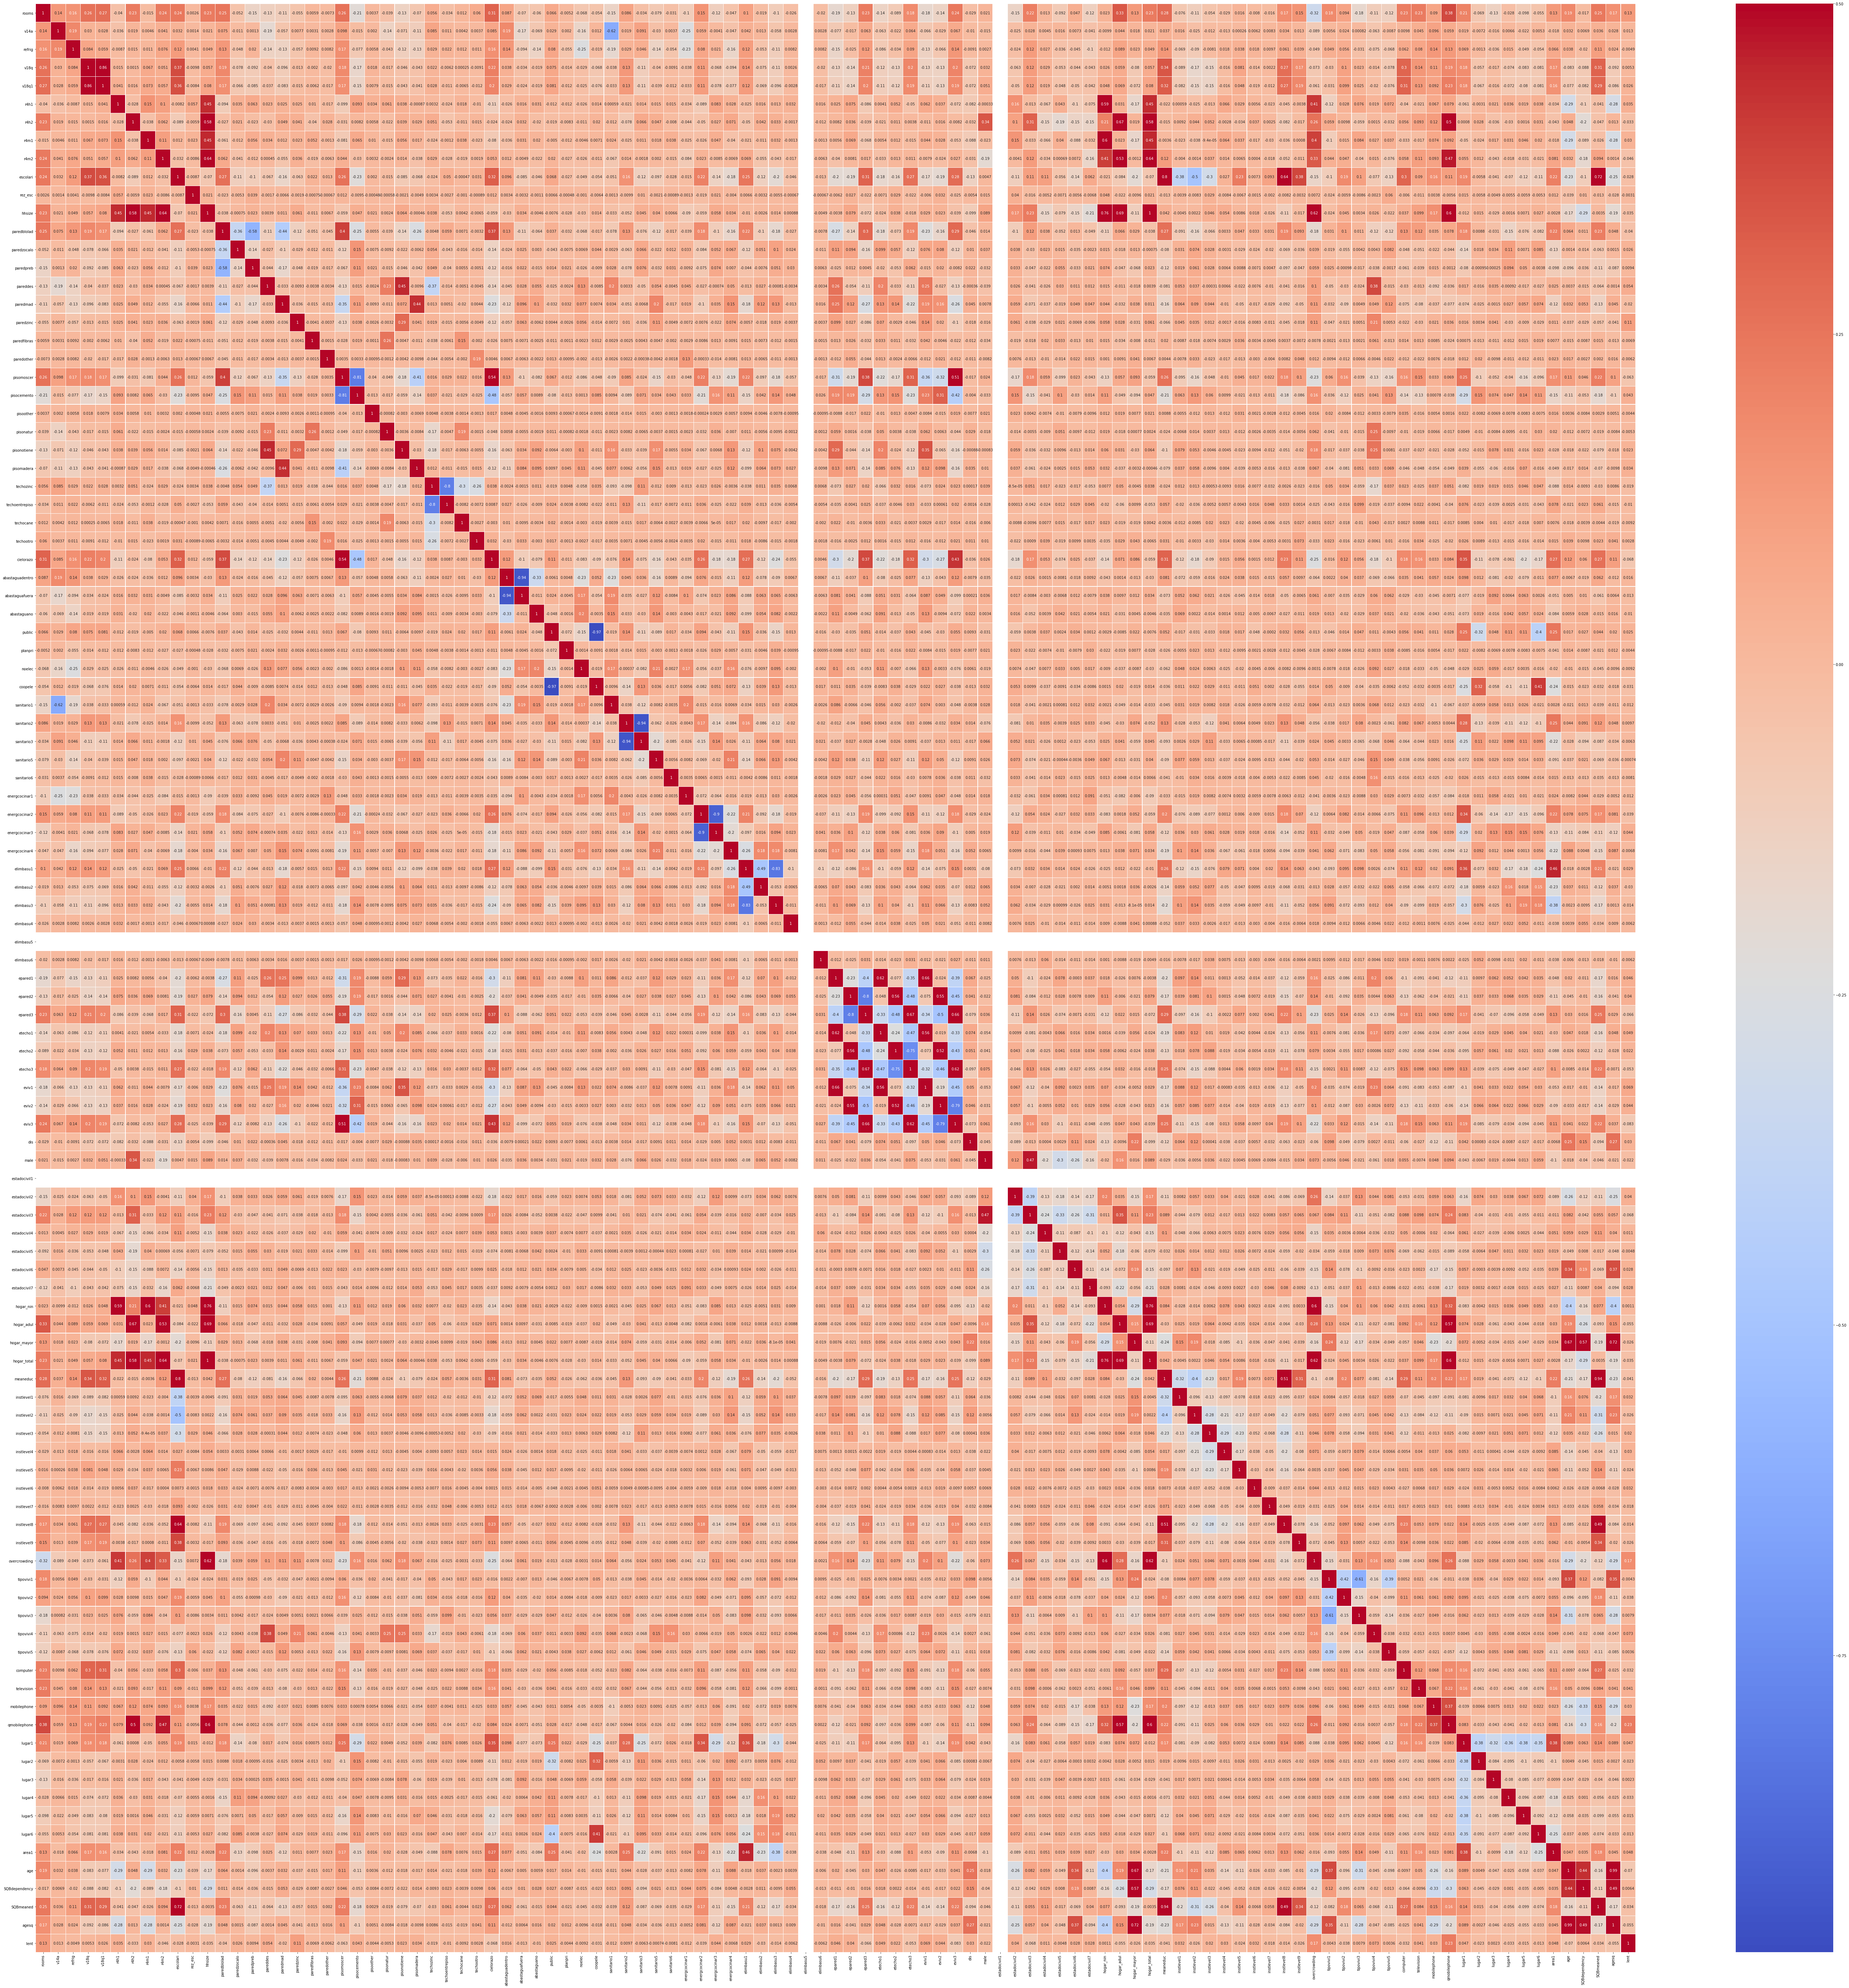

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(100, 100))

# Heatmap 설정
sns.heatmap(df_x1.corr(), linewidths=0.1, vmax=0.5, cmap="coolwarm",
            linecolor='white', annot=True)

# 렌더링
plt.show()

## 변수들간의 correlation 파악 
> - v18q & v18q1 : 0.86 태블릿 유무 겹치는 변수이므로 하나만 사용하기 
> - hhsize & r4h1 :0.45 // hhsize & r4h2 :0.58 // hhsize & r4m1 :0.45 // hhsize & r4m2 :0.64 : 가구원수 타 변수에서 모두 설명하므로 제외하기 
> - 중앙의 상관관계 일정한 형식으로 나온 경우는 벽,지붕,바닥의 좋고나쁨을 표시하는 변수이기에 3개중의 하나만 사용해도 충분 


# test 데이터 가져오기

In [59]:
df2 =pd.read_csv('./dataset/test.csv')

In [68]:
df2.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_2f6873615       NaN       0      5       0     1       1     0    NaN   
1  ID_1c78846d2       NaN       0      5       0     1       1     0    NaN   
2  ID_e5442cf6a       NaN       0      5       0     1       1     0    NaN   
3  ID_a8db26a79       NaN       0     14       0     1       1     1    1.0   
4  ID_a62966799  175000.0       0      4       0     1       1     1    1.0   

   r4h1  ...    age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0     1  ...      4            0      16               9          0   
1     1  ...     41          256    1681               9          0   
2     1  ...     41          289    1681               9          0   
3     0  ...     59          256    3481               1        256   
4     0  ...     18          121     324               1          0   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0             1             2.25           0.25     272.25     16  
1             1             2.25           0.25     272.25   1681  
2             1             2.25           0.25     272.25   1681  
3             0             1.00           0.00     256.00   3481  
4             1             0.25          64.00        NaN    324  

[5 rows x 142 columns]

In [60]:
# df2_h = df2.loc[df2["parentesco1"]==1]
df2_h = df2.fillna(0)

In [61]:
#결과값 y에 해당하는 값 삭제 
df2_x1 = df2_h
#세대주성별 교육년수 (논의필요)
df2_x1 = df2_x1.drop(["edjefa", "edjefe"],1) 
#중복정보 제거
df2_x1 = df2_x1.drop(["dependency","female","area2","hacdor","hacapo","bedrooms","r4h3","r4m3"],1) 
#수학적으로 의미가 없는 값 제거
df2_x1 = df2_x1.drop(["Id","SQBescolari", "SQBage", "SQBhogar_total", "SQBedjefe", "SQBhogar_nin", "SQBovercrowding","idhogar"],1) 
#세대주와의 관계열 제거
df2_x1 = df2_x1.drop(["parentesco1","parentesco2","parentesco3","parentesco4","parentesco5","parentesco6","parentesco7","parentesco8",
                   "parentesco9","parentesco10","parentesco11","parentesco12"],1)
df2_x1['lent'] = df2_x1['tamviv']-df2_x1['tamhog']
#집세 임시제거!!!!!!!!!!!!!!!!!!!!!!!!!!
df2_x1 = df2_x1.drop(["v2a1"],1)
df2_x1 = df2_x1.drop(["r4t1","r4t2","r4t3","tamhog","tamviv"],1) 
##새로운변수 추가 

In [62]:
df2_x1.head()

rooms  v14a  refrig  v18q  v18q1  r4h1  r4h2  r4m1  r4m2  escolari  ...   \
0      5     1       1     0    0.0     1     1     0     1         0  ...    
1      5     1       1     0    0.0     1     1     0     1        16  ...    
2      5     1       1     0    0.0     1     1     0     1        17  ...    
3     14     1       1     1    1.0     0     1     0     0        16  ...    
4      4     1       1     1    1.0     0     0     0     1        11  ...    

   lugar3  lugar4  lugar5  lugar6  area1  age  SQBdependency  SQBmeaned  \
0       0       0       0       0      1    4           0.25     272.25   
1       0       0       0       0      1   41           0.25     272.25   
2       0       0       0       0      1   41           0.25     272.25   
3       0       0       0       0      1   59           0.00     256.00   
4       0       0       0       0      1   18          64.00       0.00   

   agesq  lent  
0     16     0  
1   1681     0  
2   1681     0  
3   3481     0  
4    324     0  

[5 rows x 107 columns]

In [63]:
df2_x1 =  df2_x1.values.tolist()

In [64]:
# Testing & One-hot encoding
test_data = df2_x1


pred_val = sess.run(hypothesis, feed_dict={X: test_data})
pred_idx = sess.run(tf.argmax(pred_val, 1))

# print("predict value : \n {} \n\npredict index : {}".format(pred_val, pred_idx))
print("test data : {} \n\npredict value : \n {} \n\npredict index : {}".format(test_data, pred_val, pred_idx))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [65]:
pred_idx[:]

array([1, 3, 3, ..., 2, 3, 1], dtype=int64)

In [66]:
len(pred_idx)

23856

In [67]:
len(df2_x1)

23856

In [69]:
submission = pd.DataFrame({'Id' : df2.Id, 'Target' : pred_idx})
submission.head()

Id  Target
0  ID_2f6873615       1
1  ID_1c78846d2       3
2  ID_e5442cf6a       3
3  ID_a8db26a79       3
4  ID_a62966799       3

In [ ]:
submission.to_csv("submissions.csv", index =False)